In [2]:
import cv2
import tensorflow as tf

In [3]:
A = cv2.imread("C:/Users/Atharva Ingale/Downloads/lion.jpg")

In [4]:
import matplotlib.pyplot as plt

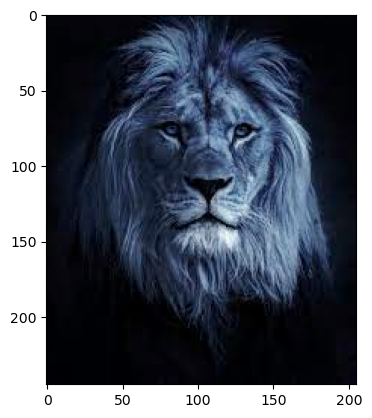

In [5]:
plt.imshow(A)

In [6]:
import pandas as pd
df = pd.read_csv("F:/ETL/Dataset/digitsnpixels.csv")

In [7]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


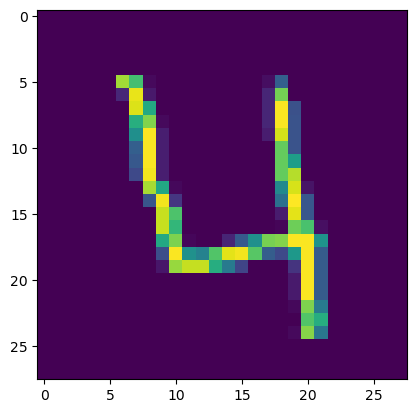

In [8]:
plt.imshow(df.iloc[3:4,1:].values.reshape(28,28))

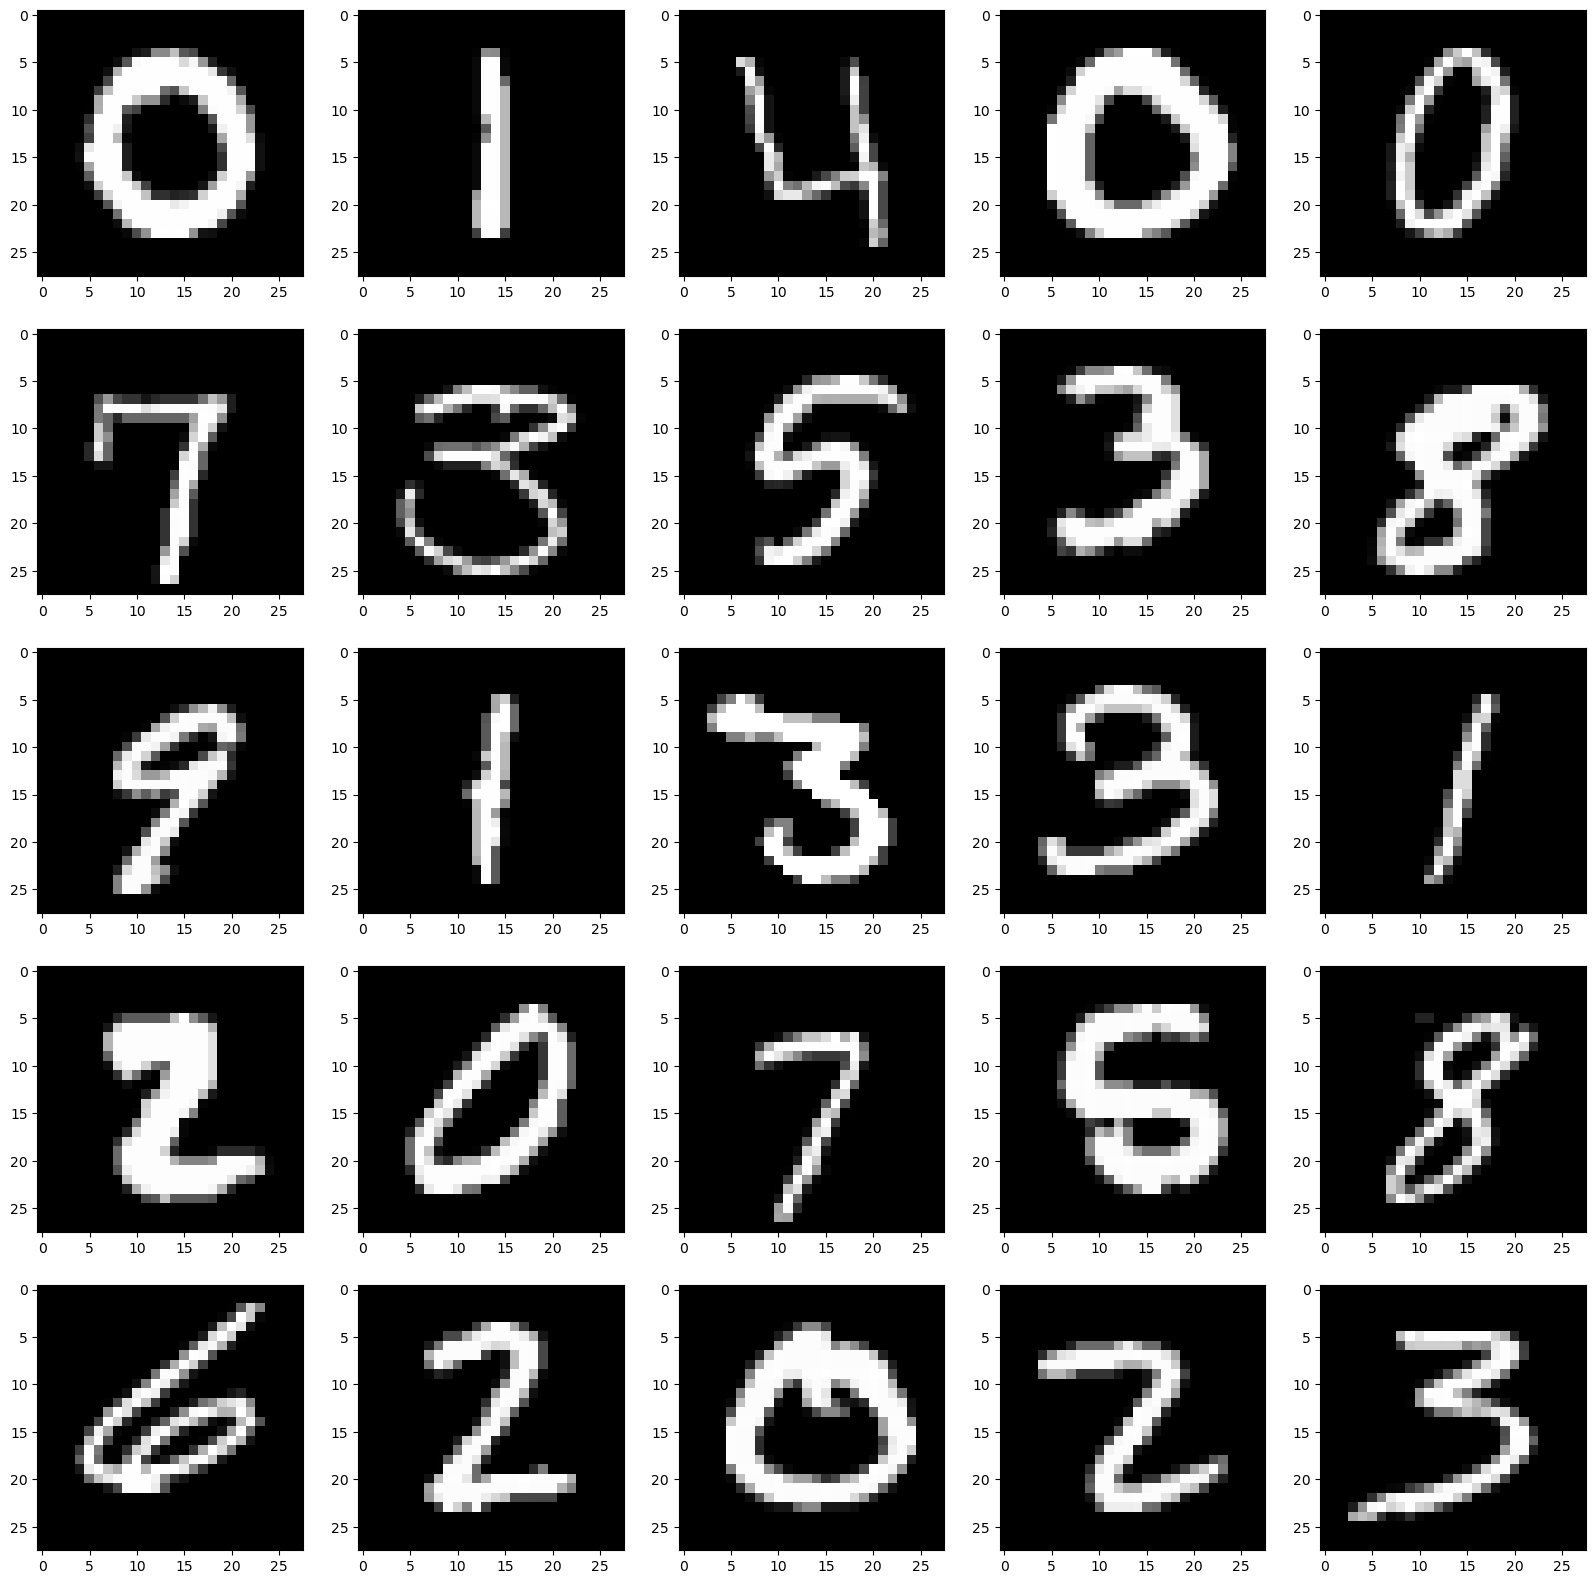

In [9]:
plt.figure(figsize=(20,20))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(df.iloc[i:i+1,1:].values.reshape(28,28),cmap="gray")

In [10]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y = df.label
Y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [12]:
Ynew = pd.get_dummies(Y).values

In [13]:
Ynew

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [14]:
Xnew = df.iloc[:,1:].values/255

In [15]:
Xnew.shape

(42000, 784)

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Ynew,test_size=0.2,random_state = 42)

In [17]:
xtrain.shape

(33600, 784)

In [18]:
xtest.shape

(8400, 784)

In [19]:
xtrain = xtrain.reshape(33600,28,28,1)
xtest = xtest.reshape(8400,28,28,1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Convolution2D,BatchNormalization,MaxPool2D,Flatten

In [21]:
with tf.device('/CPU:0'):
    nn = Sequential()
    nn.add(Convolution2D(28,kernel_size=(3,3),activation="relu",input_shape = (28,28,1)))
    nn.add(MaxPool2D(pool_size = (2,2)))
    nn.add(BatchNormalization())
    nn.add(Dropout(0.2))
    nn.add(Convolution2D(16,kernel_size=(3,3),activation="relu"))
    nn.add(MaxPool2D(pool_size = (2,2)))
    nn.add(BatchNormalization())
    nn.add(Dropout(0.2))
    nn.add(Flatten())
    nn.add(Dense(120,activation="relu"))
    nn.add(Dense(10,activation="softmax"))

In [22]:
with tf.device('/CPU:0'):
    nn.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="adam")
    nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
1050/1050 [==============================] - 22s 20ms/step - loss: 0.1954 - accuracy: 0.9384 - val_loss: 0.0618 - val_accuracy: 0.9804
Epoch 2/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0742 - accuracy: 0.9763 - val_loss: 0.0507 - val_accuracy: 0.9835
Epoch 3/10
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0569 - accuracy: 0.9818 - val_loss: 0.0443 - val_accuracy: 0.9870
Epoch 4/10
1050/1050 [==============================] - 33s 31ms/step - loss: 0.0474 - accuracy: 0.9836 - val_loss: 0.0357 - val_accuracy: 0.9892
Epoch 5/10
1050/1050 [==============================] - 28s 26ms/step - loss: 0.0408 - accuracy: 0.9865 - val_loss: 0.0331 - val_accuracy: 0.9894
Epoch 6/10
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0366 - val_accuracy: 0.9889
Epoch 7/10
1050/1050 [==============================] - 30s 29ms/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.0408 -

In [23]:
with tf.device('/CPU:0'):
    nn.predict(df.iloc[193:194,1:].values.reshape(1,28,28,1))

1/1 [==============================] - 0s 147ms/step


In [26]:
save_path = 'F:/ETL/Dataset/cnn_number.h5'
nn.save(save_path)

In [28]:
from keras.models import load_model
saved_model_path = 'F:/ETL/Dataset/cnn_number.h5'
loaded_model = load_model(saved_model_path)

In [60]:
with tf.device('/CPU:0'):
    pred = loaded_model.predict(df.iloc[9:10,1:].values.reshape(1,28,28,1))

1/1 [==============================] - 0s 26ms/step


In [61]:
pred = pred.tolist()[0]

In [62]:
result = 0
for i,j in enumerate(pred):
    if j>result:
        result = i

In [63]:
result

3

# GPU

In [24]:
# nn = Sequential()
# nn.add(Convolution2D(28,kernel_size=(3,3),activation="relu",input_shape = (28,28,1)))
# nn.add(MaxPool2D(pool_size = (2,2)))
# nn.add(BatchNormalization())
# nn.add(Dropout(0.2))
# nn.add(Convolution2D(16,kernel_size=(3,3),activation="relu"))
# nn.add(MaxPool2D(pool_size = (2,2)))
# nn.add(BatchNormalization())
# nn.add(Dropout(0.2))
# nn.add(Flatten())
# nn.add(Dense(120,activation="relu"))
# nn.add(Dense(10,activation="softmax"))

In [25]:
# nn.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="adam")
# nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=3)